In [1]:
# this is a list of features which are used in the Project Activity Score
features = [
    'Number of contributors last three months',
    'Number of commits last three months'
]

In [2]:
# returns a test vector (dict) with all unknown values
def all_unknown(alias, score_from = 0.0, score_to = 1.0, label = None):
    values = {
        'alias': alias, 
        'score_from': score_from, 
        'score_to': score_to, 
        'label': label
    }
    for feature in features:
        values[feature] = 'unknown'
    return values


class TestVector:
        
    def __init__(self, alias = ''):
        self.values = all_unknown(alias)
        
    def copy(self, vector):
        if not isinstance(vector, TestVector):
            raise Exception('Not a test vector! ({})'.format(type(vector)))
        for key in vector.values:
            if key == 'alias':
                continue
            self.values[key] = vector.values[key]
        return self
        
    def score_from(self, value):
        self.values['score_from'] = value
        return self
    
    def score_to(self, value):
        self.values['score_to'] = value
        return self
    
    def number_of_contributors(self, n):
        return self.set('Number of contributors last three months', n)
    
    def number_of_commits(self, n):
        return self.set('Number of commits last three months', n)
    
    def set(self, feature, value):
        self.values[feature] = value
        return self
    
    def make(self):
        return self.values
    
# this is raw data for test vectors
data = []
    
alias_counter = 0
    
# register a test vector
def register(test_vector, pretty=False):
    global data
    global alias_counter
    if isinstance(test_vector, dict):
        values = test_vector
    elif isinstance(test_vector, TestVector):
        values = test_vector.make()
    else:
        raise Exception('Unexpected object: {}'.format(type(test_vector)))
    if 'alias' not in values or values['alias'] == None or values['alias'] == '':
        values['alias'] = 'test_vector_{}'.format(alias_counter)
        alias_counter = alias_counter + 1
    data.append(values)
    print('registered: {}'.format(values['alias']))
    if pretty:
        pprint.PrettyPrinter(indent=4, depth=1).pprint(values)

In [3]:
all_unknown_values = TestVector().score_from(0.0).score_to(0.1)
register(all_unknown_values)

register(
    TestVector()
        .number_of_contributors(0)
        .number_of_commits(0)
        .score_from(0.0)
        .score_to(0.5)
)

# TODO: should it be less than 1.0?
register(
    TestVector()
        .number_of_contributors(1)
        .number_of_commits(5)
        .score_from(0.0)
        .score_to(3.0)
)

# TODO: should it be less than 4.0?
register(
    TestVector()
        .number_of_contributors(3)
        .number_of_commits(50)
        .score_from(2.0)
        .score_to(5.5)
)

# TODO: should it be less than 2.0?
register(
    TestVector()
        .number_of_contributors(1)
        .number_of_commits(20)
        .score_from(0.0)
        .score_to(3.5)
)

# it's not too good if a single person maintains a project
# TODO: should the score be less than 5.0?
register(
    TestVector()
        .number_of_contributors(1)
        .number_of_commits(200)
        .score_from(3.0)
        .score_to(9.0)
)

# TODO: should the score be less than 6.0?
register(
    TestVector()
        .number_of_contributors(1)
        .number_of_commits(500)
        .score_from(4.0)
        .score_to(9.0)
)

# it's good if there are many contributors even if there are not too many commits
register(
    TestVector()
        .number_of_contributors(20)
        .number_of_commits(50)
        .score_from(5.0)
        .score_to(7.0)
)

# if there are many contributors and commits, the score should be close to max
register(
    TestVector()
        .number_of_contributors(20)
        .number_of_commits(200)
        .score_from(7.0)
        .score_to(10.0)
)
register(
    TestVector()
        .number_of_contributors(30)
        .number_of_commits(400)
        .score_from(8.0)
        .score_to(10.0)
)

registered: test_vector_0
registered: test_vector_1
registered: test_vector_2
registered: test_vector_3
registered: test_vector_4
registered: test_vector_5
registered: test_vector_6
registered: test_vector_7
registered: test_vector_8
registered: test_vector_9


In [4]:
import pandas as pd
import numpy as np

# checks if two vectors have the same values
def check_same_values(first, second):
    found = False
    for key in first:
        if key in ['alias', 'score_from', 'score_to', 'label']:
            continue
        if key not in second:
            raise Exception('Missing feature: {}'.format(key))
        if first[key] != second[key]:
            found = True
    if not found:
        raise Exception('{} and {} are duplicates'.format(first['alias'], second['alias']))

# checks duplicate vectors
def check_duplicates(vector):
    global data
    for another in data:
        if vector['alias'] != another['alias']:
            check_same_values(vector, another)
        

# check if all test vectors have all required fields
aliases = set()
for vector in data:
    if 'alias' not in vector: 
        raise Exception('Missing alias!')
    if vector['alias'] in aliases:
        raise Exception('Duplicate alias "{}"!'.format(vector['alias']))
    aliases.add(vector['alias'])
    if 'score_from' not in vector:
        raise Exception('Missing score_from!')
    if vector['score_from'] < 0 or vector['score_from'] > 10:
        raise Exception('Wrong score_from!')
    if vector['score_to'] < 0 or vector['score_to'] > 10:
        raise Exception('Wrong score_to!')
    if vector['score_from'] >= vector['score_to']:
        raise Exception('score_from is greater than score_to!')
    if 'score_to' not in vector:
        raise Exception('Missing score_to!')
    for feature in features:
        if feature not in vector:
            raise Exception('Missing feature "{}"'.format(feature))
    check_duplicates(vector)

# define test vectors
test_vectors = pd.DataFrame(data)

# store the test vectors to a CSV file
filename = '../../../resources/com/sap/sgs/phosphor/fosstars/model/score/oss/ProjectActivityScoreTestVectors.csv'
test_vectors.to_csv(filename)

# print out the test vectors
test_vectors

,alias,score_from,score_to,label,Number of contributors last three months,Number of commits last three months
0,test_vector_0,0.0,0.1,None,unknown,unknown
1,test_vector_1,0.0,0.5,None,0,0
2,test_vector_2,0.0,3.0,None,1,5
3,test_vector_3,2.0,5.5,None,3,50
4,test_vector_4,0.0,3.5,None,1,20
5,test_vector_5,3.0,9.0,None,1,200
6,test_vector_6,4.0,9.0,None,1,500
7,test_vector_7,5.0,7.0,None,20,50
8,test_vector_8,7.0,10.0,None,20,200
9,test_vector_9,8.0,10.0,None,30,400


In [5]:
import matplotlib.pyplot as plt
import textwrap
    
def draw_hists(columns, width=20, height=5):
    n = len(columns)
    fig, axes = plt.subplots(1, n)
    fig.set_figwidth(width)
    fig.set_figheight(height)
    i = 0
    for column in columns:
        test_vectors[column].value_counts().plot(kind='bar', rot=0, ax=axes[i])
        axes[i].set_title(textwrap.TextWrapper(width=25).fill(column))
        i = i + 1

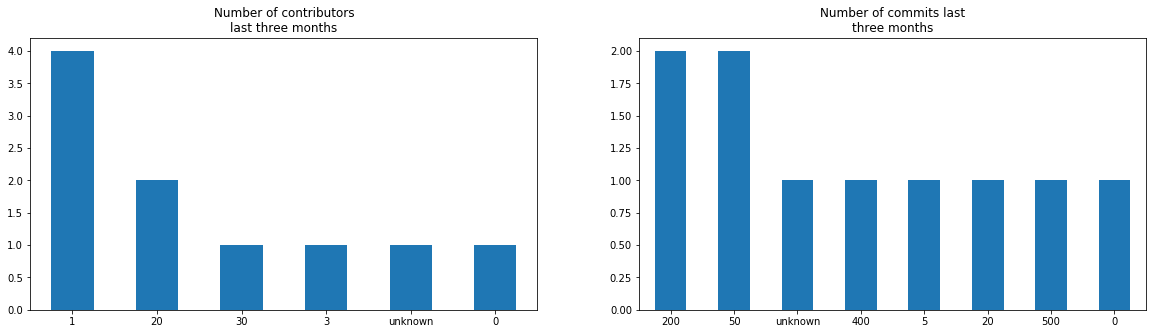

In [6]:
draw_hists([
    'Number of contributors last three months',
    'Number of commits last three months'
])